# Proyecto: Análisis de mercado inmobiliario
DIEGO FERNANDO GODOY ROJAS

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

<h1>DATOS CATEGÓRICOS</h1>
<ol>
 <li><b>Ciudad</b></li>
 <li><b>Sector de la ciudad</b></li>
 <li><b>Tipo de inmueble</b></li>
 <li><b>Descripción del inmueble</b></li>
</ol>
En los datos categóricos seleccionamos 4 variables, dos de ellas estarán relacionadas con la locación geográfica del inmueble, pues a partir de estas podremos obtener más información respecto al inmueble como que estrato socioeconómico es el sector, el valor del metro cuadro en esa zona en específico, entre otras características más, además se escogieron otras dos variables relacionadas con la descripción del inmueble, pues a partir de estas se puede caracterizar de mejor manera los diferentes tipos de inmuebles que podemos tener.

<h1>DATOS NUMÉRICOS</h1>
<ol>
 <li><b>Estrato</b></li>
 <li><b>Número de pisos</b></li>
 <li><b>Número de cuartos</b></li>
 <li><b> Número de espacios diferentes a cuartos</b></li>
 <li><b> Número de baños</b></li>
 <li><b> Número de parqueaderos</b></li>  
 <li><b>Metros cuadrados del terreno</b></li>
 <li><b>Metros cuadrados construidos</b></li>
</ol>

En cuanto a datos numéricos seleccionamos aquellos que nos dieran una descripción detallada del inmueble, como su composición, su capacidad de habitabilidad, así como sus dimensiones, todo esto nos servirá para diferenciar entre inmuebles del mismo tipo.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from sklearn import metrics
from datetime import date
from sklearn.linear_model import LinearRegression

##Adicional a las librerias convencionales importamos Prettytable para observar los resultados de una manera mas ordenada.
from prettytable import PrettyTable ##conda install -c conda-forge prettytable

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(f"El dataset de propiedades en venta publicado en el portal Properati cuenta con {data.shape[0]} filas y {data.shape[1]} columnas")

El dataset de propiedades en venta publicado en el portal Properati cuenta con 146660 filas y 19 columnas


Y sus primeras cinco instancias son:

In [3]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

Como bien sabemos el dataset contiene tanto variables categóricas como variables numéricas las cuales diferenciaremos a continuación:

**VARIABLES CATEGÓRICAS**

In [4]:
cat_vars = data.columns[data.dtypes == 'object']
x = PrettyTable()
x.add_column("Variables Categóricas",cat_vars)
print(x)

+-----------------------+
| Variables Categóricas |
+-----------------------+
|       start_date      |
|        end_date       |
|       created_on      |
|           l1          |
|           l2          |
|           l3          |
|        currency       |
|         title         |
|      description      |
|     property_type     |
|     operation_type    |
+-----------------------+


Veamos cuantas de estas columnas tienen valores faltantes:

In [5]:
x = PrettyTable()
x.add_column("Variables Categóricas",cat_vars)
x.add_column("Valores Faltantes",data[cat_vars].isna().sum().sort_values(ascending=False))
print(x)

+-----------------------+-------------------+
| Variables Categóricas | Valores Faltantes |
+-----------------------+-------------------+
|       start_date      |         0         |
|        end_date       |         0         |
|       created_on      |         0         |
|           l1          |         0         |
|           l2          |         0         |
|           l3          |         0         |
|        currency       |         0         |
|         title         |         0         |
|      description      |         0         |
|     property_type     |         0         |
|     operation_type    |         0         |
+-----------------------+-------------------+


De esta manera podemos concluir que en las variables categóricas no existen valores faltantes.

**VARIABLES NUMÉRICAS**

In [6]:
num_vars = data.columns[data.dtypes != 'object']
x = PrettyTable()
x.add_column("Variables Numericas",num_vars)
print(x)

+---------------------+
| Variables Numericas |
+---------------------+
|         lat         |
|         lon         |
|        rooms        |
|       bedrooms      |
|      bathrooms      |
|    surface_total    |
|   surface_covered   |
|        price        |
+---------------------+


Veamos cuantas de estas columnas tienen valores faltantes:

In [7]:
x = PrettyTable()
x.add_column("Variables Numericas",num_vars)
x.add_column("Valores Faltantes",data[num_vars].isna().sum().sort_values(ascending=False))
print(x)

+---------------------+-------------------+
| Variables Numericas | Valores Faltantes |
+---------------------+-------------------+
|         lat         |       21614       |
|         lon         |       20527       |
|        rooms        |        9959       |
|       bedrooms      |        9925       |
|      bathrooms      |        5957       |
|    surface_total    |         0         |
|   surface_covered   |         0         |
|        price        |         0         |
+---------------------+-------------------+


En esta ocasión si observamos valores faltantes en algunas variables, pero para entender mejor esta cantidad veamos cuantos datos son los faltantes en proporción al total de filas de nuestro data set:

In [10]:
num_f=data[num_vars].isna().sum().sort_values(ascending=False)/len(data)*100
x = PrettyTable()
x.add_column("Variables Numéricas",num_f.index)
x.add_column("Valores Faltantes (%)",np.round(num_f.values,1))
print('Proporción de los valores faltantes respecto al 100% total de filas del dataset:')
print(x)

Proporción de los valores faltantes respecto al 100% total de filas del dataset:
+---------------------+-----------------------+
| Variables Numéricas | Valores Faltantes (%) |
+---------------------+-----------------------+
|   surface_covered   |          14.7         |
|    surface_total    |          14.0         |
|         lon         |          6.8          |
|         lat         |          6.8          |
|      bathrooms      |          4.1          |
|        rooms        |          0.0          |
|       bedrooms      |          0.0          |
|        price        |          0.0          |
+---------------------+-----------------------+


Aquí ya la cantidad de valores faltantes entra a ser un porcentaje considerable del total de los datos, lo cual debe ser un aspecto a tener en cuenta más adelante al momento de realizar el manejo de los datos.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [11]:
print(f'En las propiedades registradas en nuestro dataset encontramos que habian {data.property_type.unique().size} tipos diferentes de propiedades, distribuidas de la siguiente manera:')
instancias_tipo = data.property_type.value_counts().copy()
print()
x = PrettyTable()
x.add_column("Tipo de propiedad",instancias_tipo.index)
x.add_column("Cantidad",instancias_tipo.values)
print(x)

En las propiedades registradas en nuestro dataset encontramos que habian 10 tipos diferentes de propiedades, distribuidas de la siguiente manera:

+-------------------+----------+
| Tipo de propiedad | Cantidad |
+-------------------+----------+
|    Departamento   |  107326  |
|        Casa       |  21521   |
|         PH        |  14298   |
|        Lote       |   1312   |
|      Oficina      |   658    |
|        Otro       |   374    |
|  Local comercial  |   325    |
|   Casa de campo   |   322    |
|      Depósito     |   265    |
|      Cochera      |   259    |
+-------------------+----------+


In [12]:
sns.set(palette='viridis')

In [13]:
instancias_tipo = data.property_type.value_counts().copy()
instancias_tipo = instancias_tipo.tolist()
cantidad = data.property_type.value_counts().index

La cantidad de propiedades por tipo de propiedad puede ser condensada en un gráfico para empezar a observar la proporción de unos sobre otros:

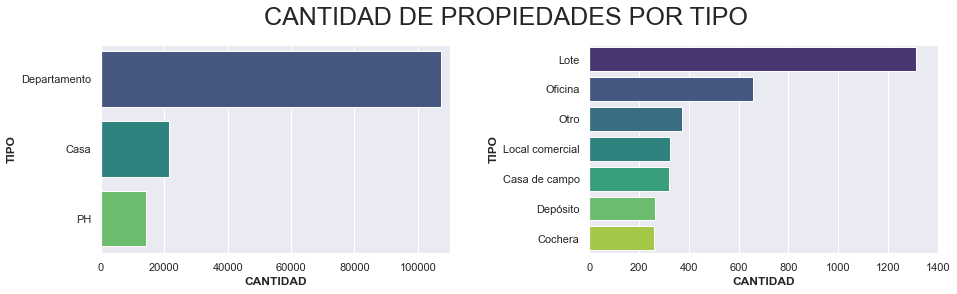

In [14]:
plt.figure(1,figsize=[15,4])
plt.suptitle('CANTIDAD DE PROPIEDADES POR TIPO', fontsize=25)

plt.subplot(121)
sns.barplot(x=instancias_tipo[0:3],
            y=cantidad[0:3],
            palette="viridis").set(xlim=(0,110000))
plt.ylabel('TIPO', fontsize=12,weight="bold")
plt.xlabel('CANTIDAD', fontsize=12,weight="bold")

plt.subplot(122)
sns.barplot(x=instancias_tipo[3:10],
            y=cantidad[3:10],
            palette="viridis").set(xlim=(0,1400))
plt.ylabel('TIPO', fontsize=12,weight="bold")
plt.xlabel('CANTIDAD', fontsize=12,weight="bold")

plt.subplots_adjust(top=0.85,wspace=0.4)
plt.show()

Sin embargo, en la gráfica anterior, la proporción es puramente visual, para esto nos puede ser útil un diagrama de pastel donde ya no observaremos la cantidad de propiedades si no su proporción respecto al total:

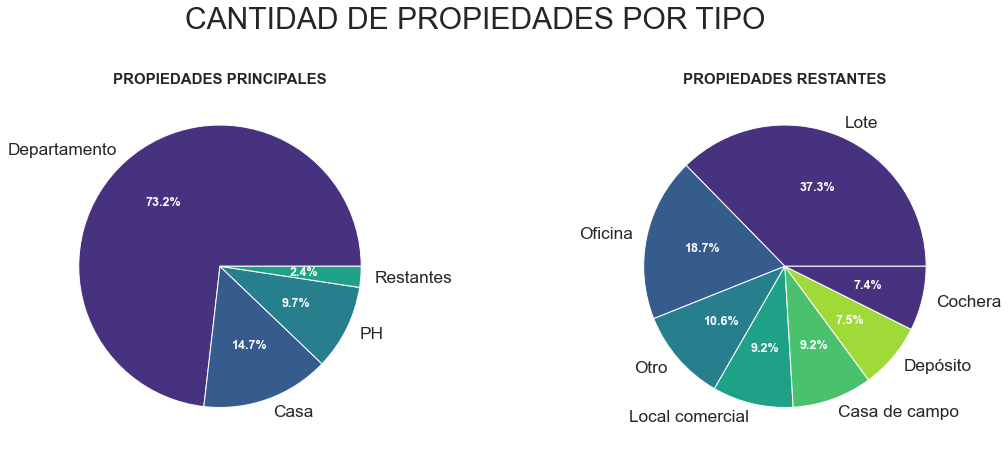

In [16]:
plt.figure(1,figsize=[15,15])
plt.suptitle('CANTIDAD DE PROPIEDADES POR TIPO', fontsize=30)

plt.subplot(121)
_, _, autopcts = plt.pie(x=instancias_tipo[0:3] + [sum(instancias_tipo[3:10])],
                 labels=np.append(cantidad[0:3],'Restantes'),
                 autopct='%1.1f%%',textprops=dict(size='x-large'))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.title('PROPIEDADES PRINCIPALES', fontsize=15,weight="bold")

plt.subplot(122)
_, _, autopcts = plt.pie(x=instancias_tipo[3:],
                 labels=cantidad[3:],
                 autopct='%1.1f%%',textprops=dict(size='x-large'))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.title('PROPIEDADES RESTANTES', fontsize=15,weight="bold")



plt.subplots_adjust(top=0.93, bottom=0.55, left=0.10, right=0.95,wspace=0.6)
plt.show()

Observamos que las tres principales propiedades conforman el 97,6% del total de datos, siendo así las de interés principal para nuestros análisis futuros.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Para responder a esta pregunta empezamos clasificando la cantidad de propiedades de acuerdo con su provincia:

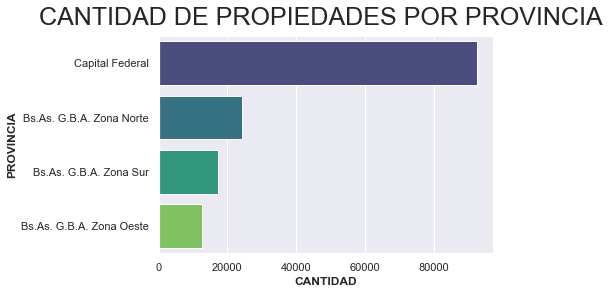

In [17]:
#plt.figure(1,figsize=[10,5])
plt.suptitle('CANTIDAD DE PROPIEDADES POR PROVINCIA', fontsize=25)
sns.countplot(data=data,
              y='l2',
              order=data.l2.value_counts().index,
              palette="viridis")
plt.ylabel('PROVINCIA', fontsize=12,weight="bold")
plt.xlabel('CANTIDAD', fontsize=12,weight="bold")
plt.show()

Posteriormente dentro de cada provincia haremos la clasificación por las zonas en donde se encuentran ubicadas las propiedades: 

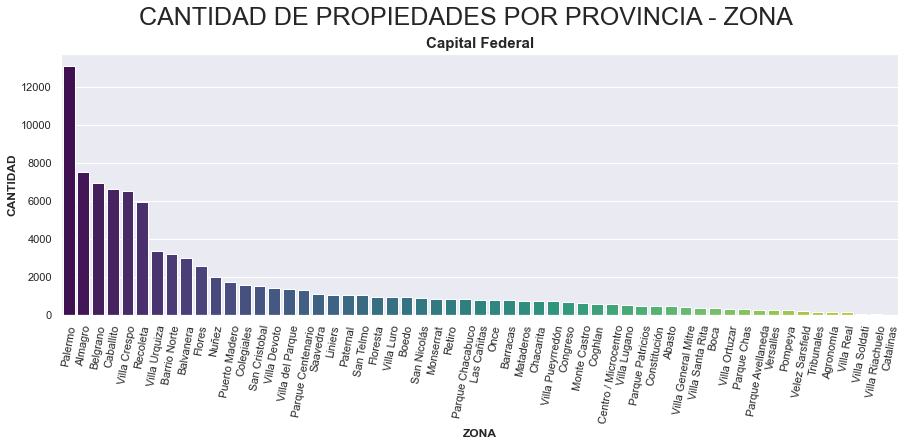

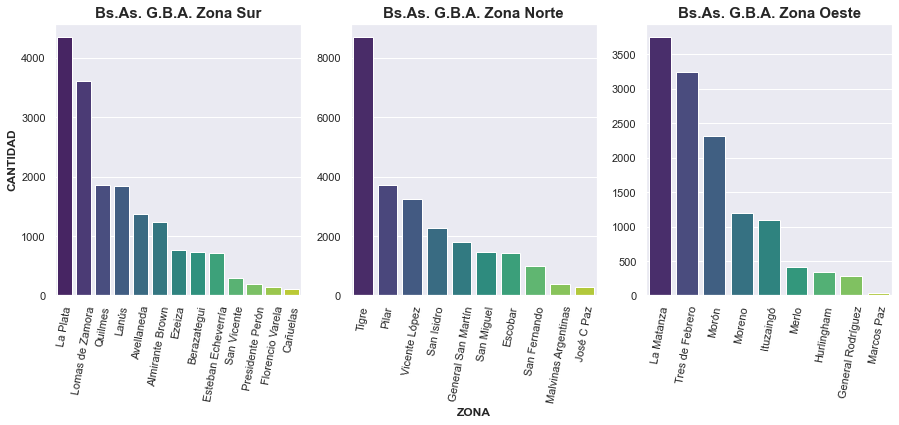

In [371]:
contador=1
for i in data.l2.unique():
    mask = (data.l2 == i)
    data.l3[mask]
    data.l3[mask].value_counts(ascending=True)
    if contador==1:
        plt.figure(contador,figsize=[15,5])
        plt.suptitle('CANTIDAD DE PROPIEDADES POR PROVINCIA - ZONA', fontsize=25)
        plt.title(f'{i}', fontsize=15,weight="bold")
        ax=sns.countplot(data=data[mask],x=data.l3[mask],order=data.l3[mask].value_counts().index,palette="viridis")
        plt.xlabel('ZONA', fontsize=12,weight="bold")
        plt.ylabel('CANTIDAD', fontsize=12,weight="bold")
        ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
        plt.subplots_adjust(top=0.85)
        #plt.savefig('fig/provizona.png')
    else:
        plt.figure(2,figsize=[15,5])
        plt.subplot(1,3,contador-1)
        ax=sns.countplot(data=data[mask],x=data.l3[mask],order=data.l3[mask].value_counts().index,palette="viridis")
        plt.title(f'{i}', fontsize=15,weight="bold")
        if contador-1 == 1:
            plt.ylabel('CANTIDAD', fontsize=12,weight="bold")
            plt.xlabel('')
        if contador-1 == 2:
            plt.ylabel('')
            plt.xlabel('ZONA', fontsize=12,weight="bold")
        if contador-1 == 3:
            plt.ylabel('')
            plt.xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
    contador+=1
#plt.savefig('fig/provizona1.png')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Como ya habíamos podido observar las tres clases más abundantes de tipos de propiedad corresponden a Departamento, Casa y PH, siendo la Capital Federal la región con más propiedades publicadas.

In [126]:
mask_2 = (data.l2 == 'Capital Federal') & ((data.property_type == 'Departamento') | (data.property_type == 'Casa') | (data.property_type == 'PH')) 
data_n = data[mask_2].copy()
print(f'El nuevo dataset filtrado tiene {data_n.shape[0]} columnas y {data_n.shape[1]} filas')

El nuevo dataset filtrado tiene 91485 columnas y 19 filas


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Seleccionamos las columnas de nuestro dataset con las que trabajaremos de aqui en adelante:

In [127]:
mask_cols=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']
data_n=data_n[mask_cols].copy()
data_n.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento


Vamos a echar un vistazo en primera instancia sobre la distribución que tienen las variables de nuestro dataset, para ello es conveniente usar la función <b>describe()</b>.

In [123]:
data_n.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


De lo anterior podemos empezar a observar ciertos detalles, sabiendo que los datos corresponden a una casa, departamento o PH, ciertos valores empiezan a no tener sentido, por ejemplo, con los valores máximos, los inmuebles que tengan 26 cuartos, 15 habitaciones o 14 baños, con certeza son outliers, al igual que el inmueble con mayor superficie total, pues vemos que está muy alejado de la media de esta variable.

Para esto veremos que valores son más representativos y menos representativos en nuestro set de datos, por ejemplo, con las variables mencionadas anteriormente podemos observar en que proporción se encuentran la mayoría de los datos:

In [21]:
x = PrettyTable()
data_n_rooms = data_n.rooms.value_counts().sort_index()
data_n_rooms = (data_n_rooms/data_n.rooms.size)*100
print('Proporción de la cantidad de habitaciones respecto al total de inmuebles:')
x.add_column("# de cuartos",data_n_rooms.index)
x.add_column("Proporción (%)",np.round(data_n_rooms.values,2))
print(x)

Proporción de la cantidad de habitaciones respecto al total de inmuebles:
+--------------+----------------+
| # de cuartos | Proporción (%) |
+--------------+----------------+
|     1.0      |      9.66      |
|     2.0      |     29.79      |
|     3.0      |     30.96      |
|     4.0      |     20.13      |
|     5.0      |      5.97      |
|     6.0      |      1.99      |
|     7.0      |      0.78      |
|     8.0      |      0.44      |
|     9.0      |      0.09      |
|     10.0     |      0.09      |
|     11.0     |      0.03      |
|     12.0     |      0.04      |
|     13.0     |      0.0       |
|     14.0     |      0.0       |
|     15.0     |      0.01      |
|     16.0     |      0.01      |
|     18.0     |      0.0       |
|     20.0     |      0.0       |
|     21.0     |      0.0       |
|     26.0     |      0.0       |
+--------------+----------------+


In [22]:
x = PrettyTable()
data_n_bedrooms = data_n.bedrooms.value_counts().sort_index()
data_n_bedrooms = (data_n_bedrooms/data_n.bedrooms.size)*100
print('Proporción de la cantidad de habitaciones respecto al total de inmuebles:')
x.add_column("# de Habitaciones",data_n_bedrooms.index)
x.add_column("Proporción (%)",np.round(data_n_bedrooms.values,2))
print(x)

Proporción de la cantidad de habitaciones respecto al total de inmuebles:
+-------------------+----------------+
| # de Habitaciones | Proporción (%) |
+-------------------+----------------+
|        0.0        |      2.42      |
|        1.0        |     37.27      |
|        2.0        |     31.82      |
|        3.0        |     21.63      |
|        4.0        |      5.31      |
|        5.0        |      0.91      |
|        6.0        |      0.35      |
|        7.0        |      0.19      |
|        8.0        |      0.04      |
|        9.0        |      0.02      |
|        10.0       |      0.01      |
|        11.0       |      0.0       |
|        12.0       |      0.01      |
|        13.0       |      0.0       |
|        14.0       |      0.01      |
|        15.0       |      0.01      |
+-------------------+----------------+


In [23]:
x = PrettyTable()
data_n_bathrooms = data_n.bathrooms.value_counts().sort_index()
data_n_bathrooms = (data_n_bathrooms/data_n.bathrooms.size)*100
print('Proporción de la cantidad de baños respecto al total de inmuebles:')
x.add_column("# de Baños",data_n_bathrooms.index)
x.add_column("Proporción (%)",np.round(data_n_bathrooms.values,2))
print(x)

Proporción de la cantidad de baños respecto al total de inmuebles:
+------------+----------------+
| # de Baños | Proporción (%) |
+------------+----------------+
|    1.0     |      59.9      |
|    2.0     |     25.77      |
|    3.0     |      8.36      |
|    4.0     |      2.59      |
|    5.0     |      0.78      |
|    6.0     |      0.17      |
|    7.0     |      0.04      |
|    8.0     |      0.0       |
|    9.0     |      0.01      |
|    10.0    |      0.01      |
|    11.0    |      0.0       |
|    12.0    |      0.0       |
|    14.0    |      0.0       |
+------------+----------------+


De los análisis anteriores podemos concluir que, en el caso de los cuartos, habitaciones y baños, existen valores que serán pocos representativos:
* A partir de 6 cuartos.
* A partir de 5 habitaciones.
* A partir de 4 baños.

Antes de realizar nuestro filtrado veremos cómo se correlacionan las variables con las que iremos a trabajar:

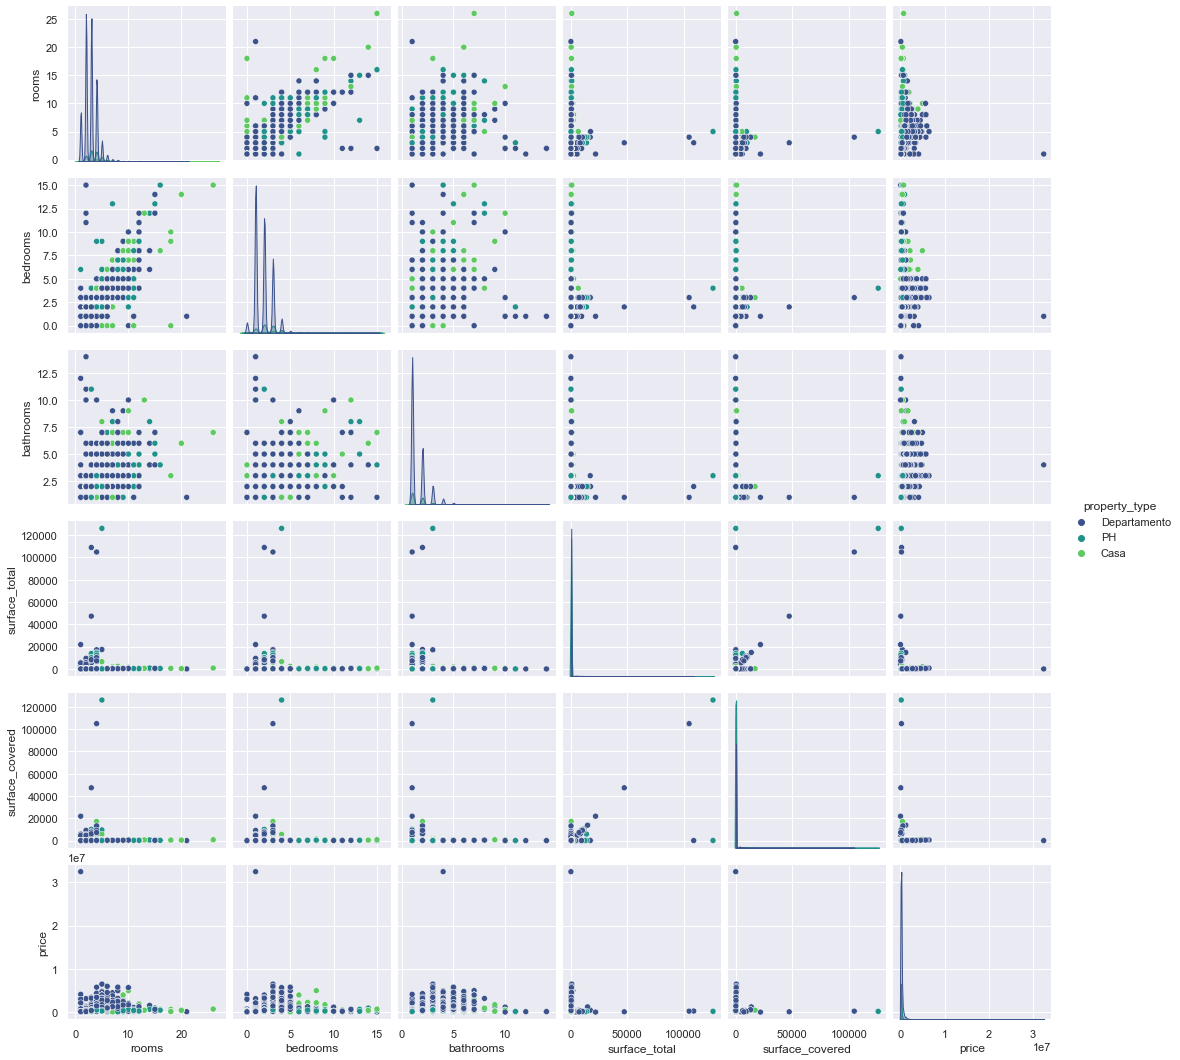

In [379]:
sns.pairplot(data_n, hue ='property_type',palette="viridis").savefig("fig/pair1.png")
plt.show()

Ahora bien, en cuanto a la variable de superficie total como ya vimos, tiene valores muy grandes los cuales con seguridad serán outliers, de esta manera realizaremos un Boxplot para realizar el filtrado de estos valores a partir del rango intercuartil (IQR), para esto se hizo la distinción del tipo de propiedad por que un outlier del tipo departamento puede ser perfectamente tenido en cuenta como un valor dentro del boxplot de tipo casa como veremos más adelante.

Pero antes definiremos un par de funciones con las que trabajaremos en varias instancias del notebook:

In [24]:
def IQRtype(var,qme,qma,mod=0,qmod=0.001):
    '''
    Función para hallar los valores IQR del boxplot
    var = Variable con la cual se desea trabajar
    qme = Valor del cuantil Q1
    qma = Valor del cuantil Q3
    
    Si el limite inferior es negativo empleamos el cuantil 0.1%
    mod = 0 por defecto / 1 para emplear el cuantil 0.1%
    qmod = por defecto cuantil 0.1%
    '''
    for i in data_n.property_type.unique():
        Q1 = data_n[data_n.property_type==i][var].quantile(qme)
        Q3 = data_n[data_n.property_type==i][var].quantile(qma)
        IQR = Q3 - Q1
        var_min = Q1 - (IQR*1.5) #EL limite inferior queda por debajo de 0
        if mod == 1:
            var_min = data_n[data_n.property_type==i][var].quantile(qmod)
        var_max = Q3 + (IQR*1.5)
        print(i)
        print(f'La variable {var} maxima es {var_max} y la minima es {var_min}')
        print("-----------")

In [25]:
def minima(var):
    '''
    Función para hallar el dato minimo de la variable por tipo de inmueble
    '''
    print(f'{var} min. por tipo de inmueble:')
    mini=[]
    for i in data_n.property_type.unique():
        mini.append(data_n[data_n.property_type==i][var].min())
    x = PrettyTable()
    x.add_column("Tipo",data_n.property_type.unique())
    x.add_column("Min.",mini)
    print(x)

In [26]:
def filt_var(data_n,var,dep_min,dep_max,ph_min,ph_max,ca_min,ca_max):
    '''
    Función para filtrar la variable del dataset por maximos y minimos dependiendo del tipo de inmueble
    dep_min,dep_max: Valor maximo y minimo a filtrar en los departamentos
    ph_min,ph_max: Valor maximo y minimo a filtrar en PH
    ca_min,ca_max: Valor maximo y minimo a filtrar en las casas
    '''
    for i in data_n.property_type.unique():
        data_nf = data_n[data_n.property_type == i]
        if i == 'Departamento':
            data_nf_c = data_nf[(data_nf[var] > dep_max) | (data_nf[var] <dep_min)]
        if i == 'PH':
            data_nf_c = data_nf[(data_nf[var] > ph_max) | (data_nf[var] <ph_min)]
        if i == 'Casa':
            data_nf_c = data_nf[(data_nf[var] > ca_max) | (data_nf[var] <ca_min)]
        data_n=data_n.drop(data_nf_c.index).copy()
    print(f'El tamaño nuevo de nuestro dataset es: {data_n.shape}')
    return data_n

Analizaremos una a una las variables de nuestro dataset:

<h2>Superficie Total

Empezamos graficando el boxplot de la superficie total para cada tipo de inmuble:

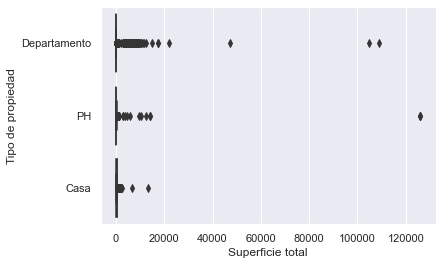

In [27]:
sns.boxplot(data = data_n, x = "surface_total",
            y='property_type',
            palette="viridis").set(xlabel='Superficie total',ylabel='Tipo de propiedad')
plt.show()

Como vemos la visualización de la gráfica no es la adecuada, pues como habíamos mencionado antes esta variable tenía la presencia de outliers, para esto podemos hacer un zoom a la gráfica y observar nuestro rango de interés:

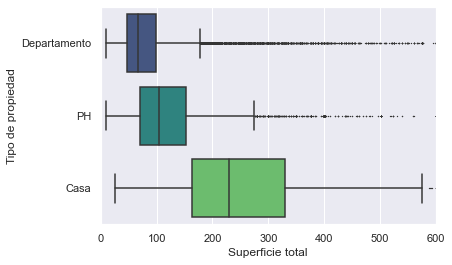

In [28]:
sns.boxplot(data = data_n, x = "surface_total",
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(0,600),xlabel='Superficie total',ylabel='Tipo de propiedad')
plt.show()

En el boxplot anterior podemos detallar el hecho que mencionábamos anteriormente, los outliers de los departamentos se encuentran dentro del rango de valores del IQR de casa, por esto es importante hacer el filtro dependiendo del tipo de inmueble:

In [29]:
IQRtype("surface_total",0.25,0.75)

Departamento
La variable surface_total maxima es 177.0 y la minima es -31.0
-----------
PH
La variable surface_total maxima es 275.0 y la minima es -53.0
-----------
Casa
La variable surface_total maxima es 579.0 y la minima es -85.0
-----------


Como podemos observar el límite inferior es negativo, lo cual supondría que cualquier valor mayor a 0 y menor a la superficie máxima, estaría dentro del boxplot, pero aprovechemos esto para filtrar también los valores más pequeños de la superficie total, como por ejemplo utilizando el cuantil 0.1%:

In [30]:
minima("surface_total")

surface_total min. por tipo de inmueble:
+--------------+------+
|     Tipo     | Min. |
+--------------+------+
| Departamento | 10.0 |
|      PH      | 10.0 |
|     Casa     | 25.0 |
+--------------+------+


In [31]:
IQRtype("surface_total",0.25,0.75,1)

Departamento
La variable surface_total maxima es 177.0 y la minima es 18.0
-----------
PH
La variable surface_total maxima es 275.0 y la minima es 23.0
-----------
Casa
La variable surface_total maxima es 579.0 y la minima es 26.0
-----------


Como podemos ver el valor mínimo de la variable a partir del dataset y empleando el cuantil 0.1% son diferentes, por lo tanto, utilizaremos este último para descartar los valores pequeños. Ahora bien, conociendo los valores de superficie total máximos y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos:

In [128]:
data_n=filt_var(data_n,'surface_total',dep_min=18,dep_max=177,ph_min=23,ph_max=275,ca_min=26,ca_max=579)

El tamaño nuevo de nuestro dataset es: (85396, 7)


Ahora bien una vez realizado el primer filtro en nuestro conjunto de datos, procedemos a hacer la limpieza de las filas donde la superficie cubierta sea mayor a la superficie total, pues esto es una incongruencia:

In [129]:
data_nf=data_n.loc[data_n.surface_covered > data_n.surface_total]
data_n=data_n.drop(data_nf.index).copy()
print(f'El tamaño nuevo de nuestro dataset es: {data_n.shape}')

El tamaño nuevo de nuestro dataset es: (84665, 7)


Podemos verificar que efectivamente todas las filas con superficie cubierta mayores a la superficie total fueron eliminadas:

In [34]:
if (data_n.surface_covered > data_n.surface_total).any()==True:
    print('Aun existen valores incongruentes')
else:
    print('El filtro de los datos fue fue realizado con exito!')

El filtro de los datos fue fue realizado con exito!


Y de una manera más grafica también podemos observarlo:

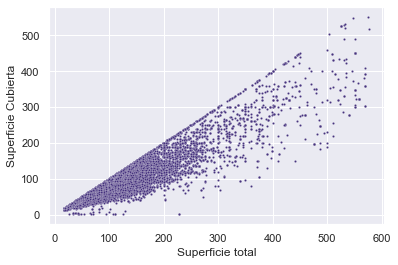

In [35]:
sns.scatterplot(data=data_n, 
                x='surface_total', y='surface_covered',
                color=sns.color_palette("viridis")[0],s=5).set(xlabel='Superficie total',ylabel='Superficie Cubierta')
plt.show()

<h1>Precios

Ahora realizaremos un procedimiento similar al de superficie total, pero esta vez con el rango de la variable de precios de los inmuebles:

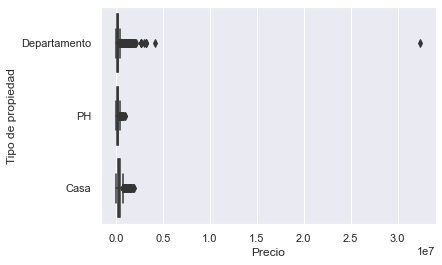

In [36]:
sns.boxplot(data = data_n, x = "price",y='property_type',palette="viridis").set(xlabel='Precio',ylabel='Tipo de propiedad')
plt.show()

Aquí nuevamente podemos observar la presencia de un valor outlier muy grande el cual nos dificulta la visualización de nuestro boxplot, haciendo zoom a nuestro rango de interés:

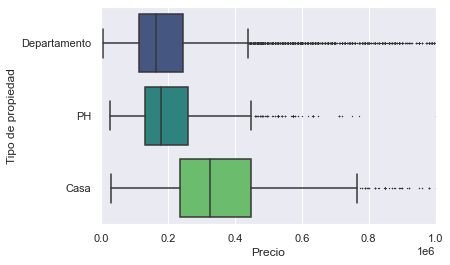

In [37]:
sns.boxplot(data = data_n, x = "price",
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(0,1000000),xlabel='Precio',ylabel='Tipo de propiedad')
plt.show()

Para conocer los datos exactos de nuestro boxplot:

In [38]:
IQRtype('price',0.25,0.75)

Departamento
La variable price maxima es 440000.0 y la minima es -80000.0
-----------
PH
La variable price maxima es 454250.0 y la minima es -63750.0
-----------
Casa
La variable price maxima es 772500.0 y la minima es -87500.0
-----------


Como podemos observar el límite inferior es negativo, lo cual supondría que cualquier valor mayor a 0 y menor al precio máximo, estaría dentro del boxplot, pero aprovechemos esto para filtrar también los valores más pequeños del precio, como por ejemplo utilizando el cuantil 0.1%:

In [39]:
minima('price')

price min. por tipo de inmueble:
+--------------+---------+
|     Tipo     |   Min.  |
+--------------+---------+
| Departamento |  7500.0 |
|      PH      | 27000.0 |
|     Casa     | 30000.0 |
+--------------+---------+


In [40]:
IQRtype("price",0.25,0.75,1)

Departamento
La variable price maxima es 440000.0 y la minima es 41757.75
-----------
PH
La variable price maxima es 454250.0 y la minima es 45000.0
-----------
Casa
La variable price maxima es 772500.0 y la minima es 51183.4
-----------


De esta manera conociendo los valores de precio máximos y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos:

In [130]:
data_n=filt_var(data_n,'price',dep_min=41757.75,dep_max=440000,ph_min=45000,ph_max=454250,ca_min=51183.4,ca_max=772500)

El tamaño nuevo de nuestro dataset es: (79836, 7)


Siguiendo este mismo proceso realizamos el filtrado de todas nuestras variables a partir del boxplot, teniendo en cuenta los tipos de inmuebles:

<h1>Superficie Cubierta

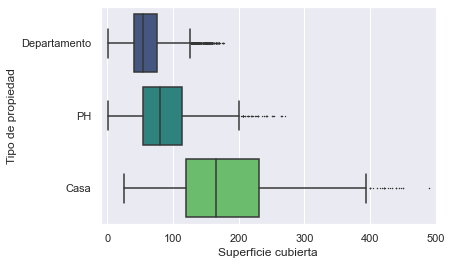

In [42]:
sns.boxplot(data = data_n, x = "surface_covered",
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(-10,500),xlabel='Superficie cubierta',ylabel='Tipo de propiedad')
plt.show()

De esta manera para conocer los valores exactos de nuestro boxplot y sabiendo que el límite inferior es negativo, lo cual supondría que cualquier valor mayor a 0 y menor a la superficie cubierta máxima, estaría dentro del boxplot, pero aprovechemos esto para filtrar también los valores más pequeños de la superficie cubierta, como por ejemplo utilizando el cuantil 0.2%:

In [43]:
minima('surface_covered')

surface_covered min. por tipo de inmueble:
+--------------+------+
|     Tipo     | Min. |
+--------------+------+
| Departamento | 1.0  |
|      PH      | 1.0  |
|     Casa     | 26.0 |
+--------------+------+


In [44]:
IQRtype('surface_covered',0.25,0.75,1,0.002)

Departamento
La variable surface_covered maxima es 126.0 y la minima es 18.0
-----------
PH
La variable surface_covered maxima es 200.0 y la minima es 23.0
-----------
Casa
La variable surface_covered maxima es 397.5 y la minima es 33.0
-----------


De esta manera conociendo los valores de superficie total máximos y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos:

In [131]:
data_n=filt_var(data_n,'surface_covered',dep_min=18,dep_max=126,ph_min=23,ph_max=200,ca_min=33,ca_max=397.5)

El tamaño nuevo de nuestro dataset es: (77965, 7)


<h1>Baños

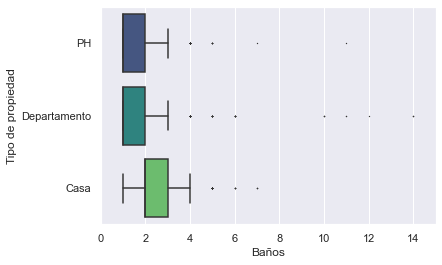

In [47]:
sns.boxplot(data = data_n, x = "bathrooms" , 
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(0,15),xlabel='Baños',ylabel='Tipo de propiedad')
plt.show()

Para conocer los datos exactos de nuestro boxplot:

In [48]:
IQRtype('bathrooms',0.25,0.75)

PH
La variable bathrooms maxima es 3.5 y la minima es -0.5
-----------
Departamento
La variable bathrooms maxima es 3.5 y la minima es -0.5
-----------
Casa
La variable bathrooms maxima es 4.5 y la minima es 0.5
-----------


Como podemos observar el límite inferior es negativo, lo cual supondría que cualquier valor mayor a 0 y menor a la cantidad de baños máxima, estaría dentro del boxplot, pero aprovechemos esto para filtrar también los valores más pequeños del precio, como por ejemplo utilizando el cuantil 0.1%, el cual coincide con la cantidad de baños mínima por tipo de inmueble:

In [49]:
minima('bathrooms')

bathrooms min. por tipo de inmueble:
+--------------+------+
|     Tipo     | Min. |
+--------------+------+
|      PH      | 1.0  |
| Departamento | 1.0  |
|     Casa     | 1.0  |
+--------------+------+


In [50]:
IQRtype('bathrooms',0.25,0.75,1)

PH
La variable bathrooms maxima es 3.5 y la minima es 1.0
-----------
Departamento
La variable bathrooms maxima es 3.5 y la minima es 1.0
-----------
Casa
La variable bathrooms maxima es 4.5 y la minima es 1.0
-----------


De esta manera conociendo las cantidades de baños máximos y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos, teniendo en cuenta que el máximo de baños será igual 4 el cual definimos anteriormente como el valor representativo mínimo para esta variable:

In [132]:
data_n=filt_var(data_n,'bathrooms',dep_min=1,dep_max=3,ph_min=1,ph_max=3,ca_min=1,ca_max=4)

El tamaño nuevo de nuestro dataset es: (77530, 7)


<h1>Habitaciones

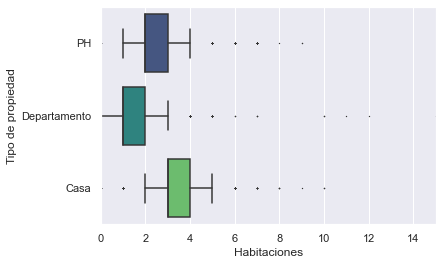

In [52]:
sns.boxplot(data = data_n, x = "bedrooms",
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(0,15),xlabel='Habitaciones',ylabel='Tipo de propiedad')
plt.show()

Para conocer los datos exactos de nuestro boxplot:

In [53]:
IQRtype('bedrooms',0.25,0.75)

PH
La variable bedrooms maxima es 4.5 y la minima es 0.5
-----------
Departamento
La variable bedrooms maxima es 3.5 y la minima es -0.5
-----------
Casa
La variable bedrooms maxima es 5.5 y la minima es 1.5
-----------


Como podemos observar el límite inferior es negativo, lo cual supondría que cualquier valor mayor a 0 y menor a número de habitaciones máximo, estaría dentro del boxplot, pero aprovechemos esto para filtrar también los valores más pequeños, como por ejemplo utilizando el cuantil 0.1%:

In [54]:
minima('bedrooms')

bedrooms min. por tipo de inmueble:
+--------------+------+
|     Tipo     | Min. |
+--------------+------+
|      PH      | 0.0  |
| Departamento | 0.0  |
|     Casa     | 0.0  |
+--------------+------+


In [55]:
IQRtype('bedrooms',0.25,0.75,1)

PH
La variable bedrooms maxima es 4.5 y la minima es 1.0
-----------
Departamento
La variable bedrooms maxima es 3.5 y la minima es 0.0
-----------
Casa
La variable bedrooms maxima es 5.5 y la minima es 0.0
-----------


De esta manera conociendo las cantidades de habitaciones máximas y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos, teniendo en cuenta que el máximo de habitaciones será igual 5 el cual definimos anteriormente como el valor representativo máximo para esta variable, adicional no tiene mucho sentido una casa sin habitaciones, valor que es poco representativo también, por lo tanto estableceremos un mínimo para este tipo de inmueble en 1:

In [133]:
data_n=filt_var(data_n,'bedrooms',dep_min=0,dep_max=3,ph_min=1,ph_max=4,ca_min=1,ca_max=5)

El tamaño nuevo de nuestro dataset es: (76407, 7)


<h1>Cuartos

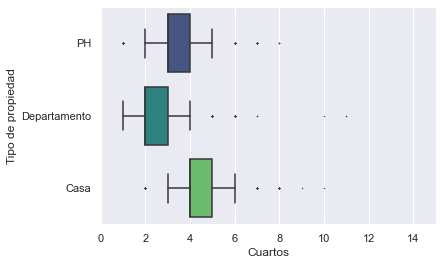

In [57]:
sns.boxplot(data = data_n, x = "rooms",
            y='property_type',palette="viridis",
            fliersize=0.5).set(xlim=(0,15),xlabel='Cuartos',ylabel='Tipo de propiedad')
plt.show()

Para conocer los datos exactos de nuestro boxplot:

In [58]:
IQRtype('rooms',0.25,0.75)

PH
La variable rooms maxima es 5.5 y la minima es 1.5
-----------
Departamento
La variable rooms maxima es 4.5 y la minima es 0.5
-----------
Casa
La variable rooms maxima es 6.5 y la minima es 2.5
-----------


De esta manera conociendo las cantidades de cuartos máximas y mínimos para cada tipo de inmueble, procedemos a realizar el filtrado de nuestro conjunto de datos, teniendo en cuenta que el máximo de cuartos será igual 6 el cual definimos anteriormente como el valor representativo mínimo para esta variable:

In [134]:
data_n=filt_var(data_n,'rooms',dep_min=0,dep_max=4,ph_min=1,ph_max=5,ca_min=2,ca_max=6)

El tamaño nuevo de nuestro dataset es: (75821, 7)


Una vez realizamos el filtrado de todas las variables de nuestro conjunto de datos procedemos a realizar el pairplot de estas:

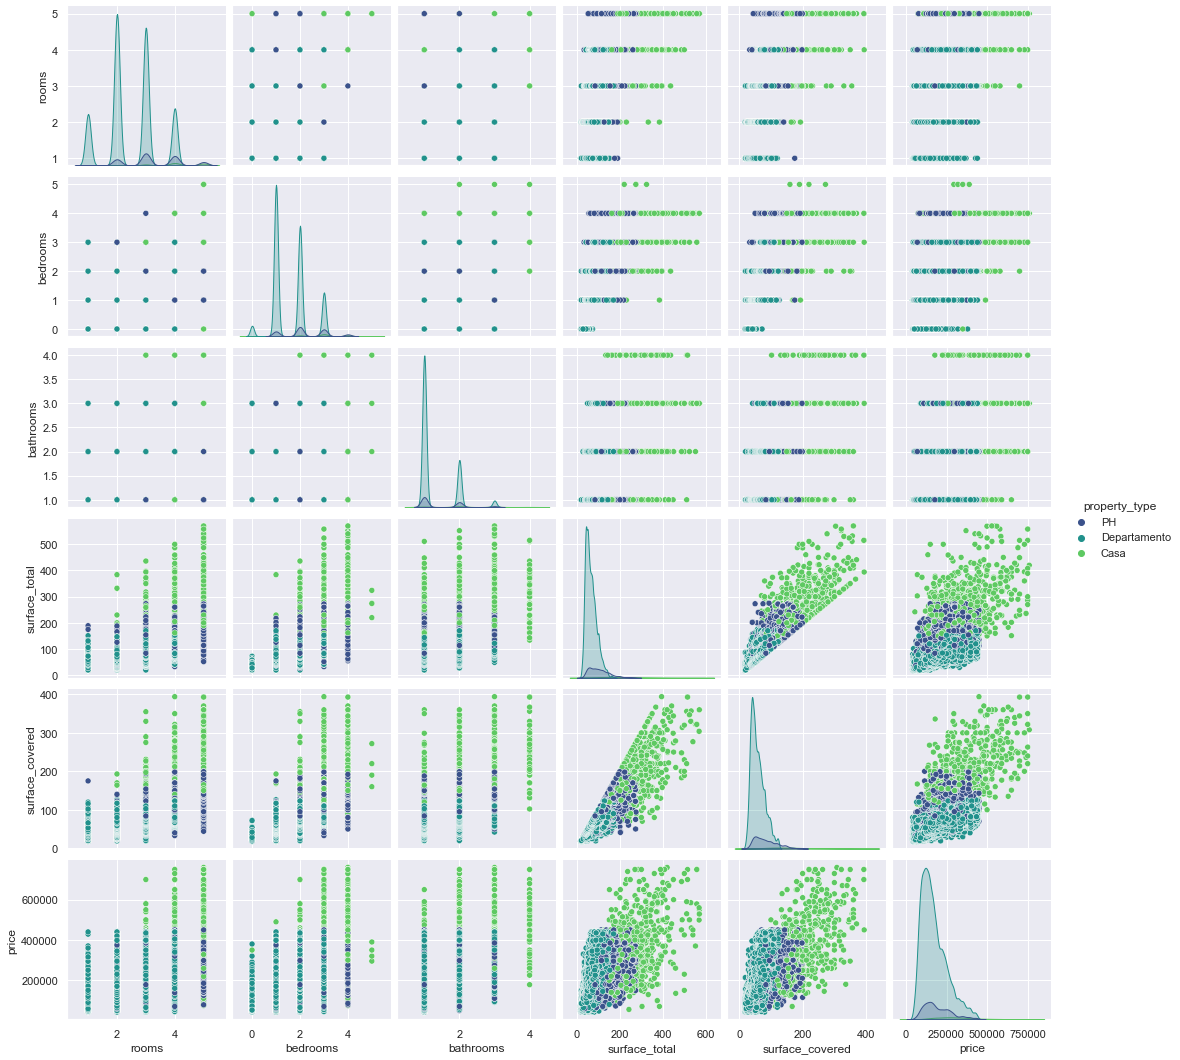

In [401]:
sns.pairplot(data_n, hue ='property_type',palette="viridis").savefig("fig/pair1F.png")
plt.show()

Después de nuestro filtrado podemos observar mejor las correlaciones que existen entre algunas variables, ya distinguiendo agrupaciones en algunas zonas como en las correlaciones entre las superficies y el precio.

In [135]:
data_n.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,75821.000000,75821.000000,73857.000000,67834.000000,67511.000000,75821.000000
mean,2.640667,1.706717,1.325968,73.159522,63.373465,178070.086177
std,0.976221,0.841699,0.553043,43.038202,31.736694,85959.296658
min,1.000000,0.000000,1.000000,18.000000,18.000000,42000.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,115000.000000
50%,3.000000,2.000000,1.000000,63.000000,56.000000,158000.000000
75%,3.000000,2.000000,2.000000,87.000000,76.000000,225000.000000
max,6.000000,5.000000,4.000000,570.000000,394.000000,760000.000000


Observando nuevamente la distribución de nuestras variables también podemos observar un mejor comportamiento entre la media, la desviación estándar y los valores de nuestro dataset.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Como nuestro análisis se realizó por tipo de propiedad, hallaremos también de manera individual los mapas de correlaciones para cada tipo:

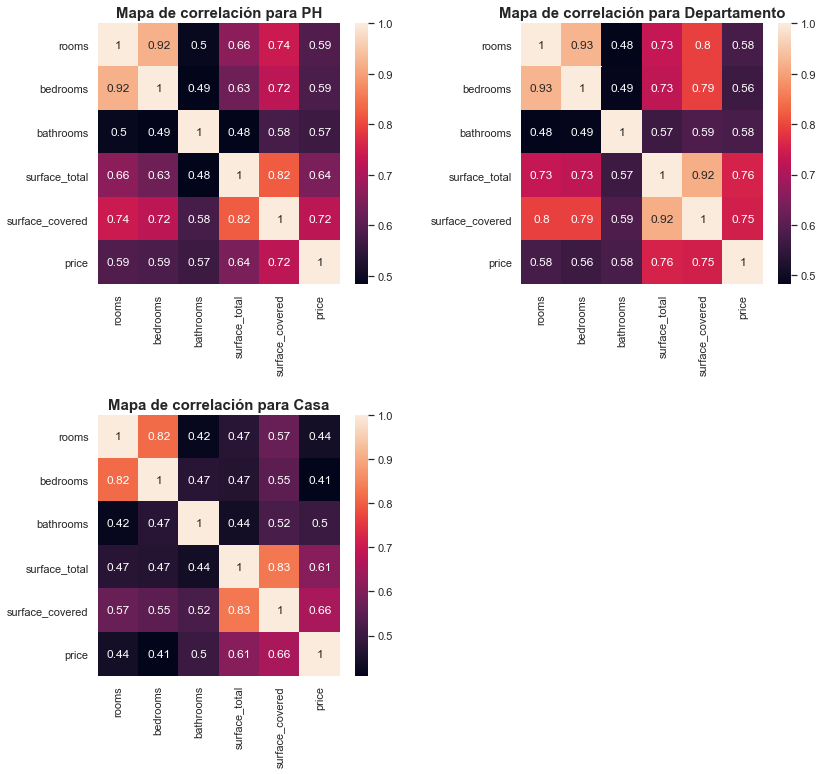

In [59]:
plt.figure(1,figsize=[13,12])
subcon=1
for i in data_n.property_type.unique():
    plt.subplot(2,2,subcon)
    plt.title(f'Mapa de correlación para {i}', fontsize=15,weight="bold")
    data_v=data_n[data_n.property_type==i]
    sns.heatmap(data_v.corr(), annot = True)
    subcon=subcon+1
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

Podemos observar que la correlación entre variables cambia dependiendo del tipo de propiedad siendo mayor en unas que en otras, por esto fue importante realizar el filtrado de datos por tipo de propiedad, de esta manera el posible conjunto de variables que nos ayudaran a realizar nuestra predicción de precios debe incluir si o si la superficie total y la superficie cubierta, pues como vemos en el mapa de correlaciones para los tres tipos de propiedad estas son las variables con mayor correlación al precio, además de tener una gran correlación entre ellas dos.

Por último, veremos la correlación que existe entre las variables sin hacer distinción por tipo de propiedad.

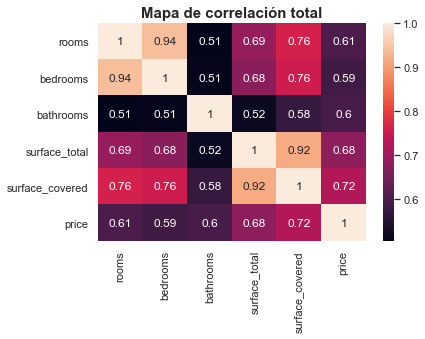

In [51]:
plt.title('Mapa de correlación total', fontsize=15,weight="bold")
sns.heatmap(data_n.corr(), annot = True)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

En este caso el desafío que propongo será ¿Cuantos días promedio dura la publicación de venta del inmueble? ¿La duración tiene algo que ver con el precio de venta de la propiedad? Pues esta ha sido información que no utilizamos anteriormente, pero también puede aportar información importante en un análisis de datos.

Para ser más específicos trabajaremos al igual que antes, con la provincia donde hay más propiedades utilizando las tres principales de ellas:

In [60]:
mask_3 = (data.l2 == 'Capital Federal') & ((data.property_type == 'Departamento') | (data.property_type == 'Casa') | (data.property_type == 'PH')) 
data_f = data[mask_3].copy()
print(f'El nuevo dataset filtrado tiene {data_f.shape[0]} columnas y {data_f.shape[1]} filas')

El nuevo dataset filtrado tiene 91485 columnas y 19 filas


Empezamos reiniciando los indexs de nuestro nuevo dataset y calculando la diferencia entre fechas de inicio y finalización para cada anuncio:

In [61]:
data_f.reset_index(drop=True, inplace=True) #Se realiza por que el dataset con el que vamos a trabajar se construyo
                                            #a partir del dataset original y las filas conservaron los index antiguos

In [62]:
fecha_i = data_f.start_date
fecha_f = data_f.end_date
dif_fechas = []
price_fechas = []
#[0:4] #AÑO
#[5:7] #MES
#[8:10] #DIA
for i in range(fecha_i.size):
    if int(fecha_f[i][0:4]) == 2019 or int(fecha_f[i][0:4]) == 2020:
        if int(fecha_i[i][0:4]) == 2019 or int(fecha_i[i][0:4]) == 2020:
            future_date = date(int(fecha_f[i][0:4]),int(fecha_f[i][5:7]),int(fecha_f[i][8:10]))
            actual_date = date(int(fecha_i[i][0:4]),int(fecha_i[i][5:7]),int(fecha_i[i][8:10]))
            dif_fechas.append((future_date - actual_date).days)
            price_fechas.append(data_f.price[i])
dias=dif_fechas

Para observar de mejor manera la duración de los anuncios en venta de las propiedades, graficamos:

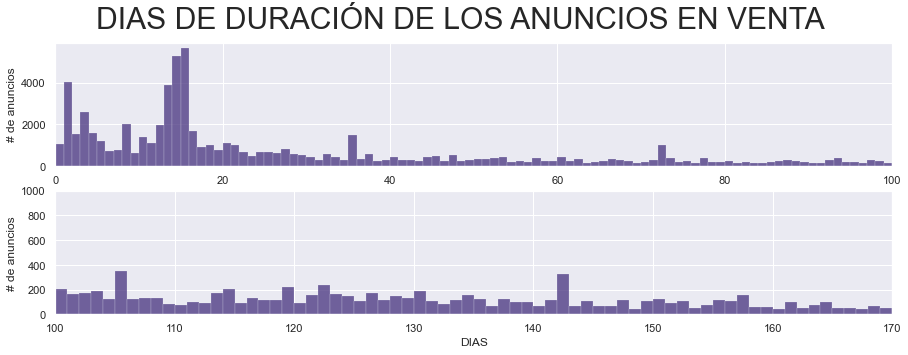

In [63]:
plt.figure(1,figsize=[15,5])
plt.suptitle('DIAS DE DURACIÓN DE LOS ANUNCIOS EN VENTA', fontsize=30)
plt.subplot(211)
plt.ylabel('# de anuncios')
sns.histplot(data=dif_fechas,binwidth=1,color=sns.color_palette("viridis")[0]).set(xlim=(0,100))
plt.subplot(212)
plt.ylabel('# de anuncios')
plt.xlabel('DIAS')
sns.histplot(data=dif_fechas,binwidth=1,color=sns.color_palette("viridis")[0]).set(xlim=(100,170),ylim=(0,1000))
plt.show()

Ahora obtenemos la cantidad de anuncios por número de días:

In [64]:
def unique(list1):
    x = np.array(list1)
    return np.unique(x,return_counts=True)
dif_fechas=unique(dif_fechas)

In [65]:
x = PrettyTable()
print('Proporción acumulada de la duración de un anuncio:')
x.field_names = ["# de dias", "Proporción acumulada"]
acumulado = 0
for i in range(0,23):
    proporcion = (dif_fechas[1][i]/dif_fechas[1].sum())*100
    acumulado = acumulado+proporcion
    x.add_row([dif_fechas[0][i], round(acumulado,2)])
print(x)
print(f'El anuncio que mas ha durado ha sido de {max(dif_fechas[0])} dias.')

Proporción acumulada de la duración de un anuncio:
+-----------+----------------------+
| # de dias | Proporción acumulada |
+-----------+----------------------+
|     0     |         1.29         |
|     1     |         6.32         |
|     2     |         8.23         |
|     3     |        11.47         |
|     4     |        13.43         |
|     5     |        14.94         |
|     6     |        15.83         |
|     7     |        16.82         |
|     8     |        19.35         |
|     9     |        20.14         |
|     10    |        21.85         |
|     11    |         23.2         |
|     12    |        25.66         |
|     13    |        30.47         |
|     14    |        37.04         |
|     15    |        44.05         |
|     16    |        46.15         |
|     17    |        47.26         |
|     18    |        48.52         |
|     19    |         49.5         |
|     20    |        50.87         |
|     21    |         52.1         |
|     22    |        52.

A partir del tratamiento de la información podemos encontrar que aproximadamente el 50% de los anuncios duran entre 20 días o menos en ser retirados, sin embargo, aquí tendremos ciertos sesgos:

* El motivo por el cual el anuncio fue retirado de la página, ya que pudo haber sido por que el inmueble se vendió, porque el vendedor cambio de opinión sobre la venta o en los casos donde la duración en de cero días se pudo deber a que el vendedor retiro la publicación para modificarla y subirla nuevamente el mismo día.

* La fecha de finalización del asunto puede no corresponder al día exacto en el que se realizó la venta, pues al vendedor se le pudo olvidar retirar el anuncio una vez realizada la compra del inmueble, lo cual puede ser razón de algunos outliers que presenta este conjunto de datos.

Entonces de esta manera podemos concluir que el día de finalización del anuncio no significa que el inmueble hubiera sido vendido. Ahora bien, otro aspecto que podemos evaluar es si el precio de venta tiene relación alguna con la duración del anuncio:

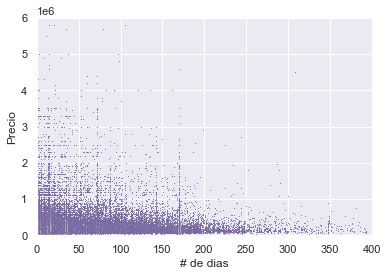

In [66]:
sns.scatterplot(x=dias,y=price_fechas,
                s=1,color=sns.color_palette("viridis")[0]).set(ylim=(0,6000000),xlim=(0,400),xlabel='# de dias',ylabel='Precio')
plt.show()

Como podemos ver en primera instancia parece que ambias variables no tuvieran relación alguna, pero para establecer esta conclusión hallaremos el coeficiente de relación de Pearson:

In [67]:
my_rho = np.corrcoef(dias, price_fechas)

print(f'El coeficiente de relación de pearson entre el numero de dias y el precio es de {round(my_rho[0,1],4)}.')

El coeficiente de relación de pearson entre el numero de dias y el precio es de 0.0168.


Al ser el coeficiente de relación de Pearson cercano a 0 podemos concluir ahora sí que no existe relación alguna, por lo tanto, el precio no influye en nada para la duración del anuncio de la propiedad.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

Para empezar cargaremos y filtraremos el dataset con el que vamos a trabajar:

In [68]:
data_m = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
mask_1 = (data_m.l2 == 'Capital Federal') & ((data_m.property_type == 'Departamento') | (data_m.property_type == 'Casa') | (data_m.property_type == 'PH')) 
data_m = data_m[mask_1].copy()
mask_2 = (data_m.surface_total<=1000) & (data_m.surface_total>=15) 
data_m = data_m[mask_2].copy()
mask_3 = (data_m.price<=4000000)
data_m = data_m[mask_3].copy()
data_m = data_m[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].copy()
data_m = data_m.dropna().copy()

In [69]:
data_m.shape

(81019, 6)

De esta manera antes de empezar con nuestro diseño de modelos de Machine Learning definiremos las métricas apropiadas para evaluar los resultados que obtendremos.

<h3>ERROR ABSOLUTO MEDIO (MAE)</h3>

El error absoluto medio sirve para cuantificar la precisión de una técnica de predicción comparando por ejemplo los valores predichos frente a los observados:

$$\frac{1}{n}\sum_{i=1}^{n}|y_i -\hat{y}_i|$$

<h3>RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE) </h3>

Tendremos como primera instancia una métrica de medición de error, la cual se calcula a partir de la raíz de la media cuadrática de las diferencias entre los valores previstos y los valores observados, tiene como ventaja que se puede medir en las mismas unidades que la variable objetivo:

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2}$$


Esta métrica tiene un problema al dar más importancia a los errores grandes, sin embargo, se utiliza más en algunos casos porque los errores se cuadran primero al cuadrado antes de promediar, lo que supone una gran penalización en los errores grandes. Esto implica que RMSE es útil cuando no se desean errores grandes.
    
<h3>COEFICIENTE DE DETERMINACIÓN (R-CUADRADO)</h3>

El coeficiente de determinación mide la porción de la varianza de la variable objetivo que se puede explicar por el modelo.

R-Cuadrado tiene un valor máximo de 1 (cuando el modelo explica toda la varianza) y 0 en el caso contrario.

Un problema importante que tiene esta métrica es que no nos muestra si el modelo explica la varianza debido a que está sobre ajustado. Por eso una medida mejor es el Coeficiente de determinación ajustado (R-Cuadrado Ajustado), que tiene en consideración la complejidad del modelo.

$$1 - \frac{(1 - R^2)(n-1)}{(n-k-1)}$$

Para hallar estas métricas definiremos la función **compa_y**, la cual nos devolverá las métricas MAE, RSEM, R-Cuadrado y R-Cuadrado ajustado, adicional nos graficará la comparación entre los datos predichos contra los datos reales:

In [70]:
def compa_y(y_test,y_test_pred):

    ax_kkn = plt.subplot(111)
    ax_kkn.scatter(y_test,y_test_pred, s =2,color=sns.color_palette("viridis")[0])

    lims = [np.min([ax_kkn.get_xlim(), ax_kkn.get_ylim()]),  # min of both axes
            np.max([ax_kkn.get_xlim(), ax_kkn.get_ylim()]),  # max of both axes]
           ]
    ax_kkn.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.tight_layout()
    plt.title(f'Exactitud del modelo.')
    plt.xlabel('Precio real')
    plt.ylabel('Precio Predicho')
    
    MAE_train = metrics.mean_absolute_error(y_train,y_train_pred)
    MAE_test  = metrics.mean_absolute_error(y_test,y_test_pred)

    RMSE_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_test  = np.sqrt(mean_squared_error(y_test,y_test_pred))

    r2_train = metrics.r2_score(y_train, y_train_pred)
    r2_test  = metrics.r2_score(y_test, y_test_pred)

    r2_train_adj = 1 - ((1 - r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
    r2_test_adj = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    
    x = PrettyTable()
    x.field_names = ['MÉTRICA',"TRAIN", "TEST"]
    x.add_row(["MAE", round(MAE_train), round(MAE_test)])
    x.add_row(["RMSE", round(RMSE_train), round(RMSE_test)])
    x.add_row(["R2", round(r2_train,3),round(r2_test,3)])
    x.add_row(["R2_A",round(r2_train_adj,3), round(r2_test_adj,3)])
    
    print(x)

Una vez definidas nuestras métricas de evaluación procedemos a seleccionar nuestras variables predictoras **(X)** junto con la variable de interés a predecir **(y)** la cual será el precio de la propiedad:

In [71]:
X = data_m[['rooms','bedrooms','bathrooms','surface_total','surface_covered']]
y = data_m['price']

Ahora realizamos el Train/Split de los datos para una proporción de los datos de prueba del 30%:

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h1>Modelo Benchmark

Utilizaremos para nuestro benchmark un modelo basado en una regresión lineal:

In [73]:
linear_model = LinearRegression()

Entrenamos el modelo:

In [74]:
linear_model.fit(X_train, y_train)

LinearRegression()

Realizamos la predicción del conjunto de prueba y entrenamiento:

In [75]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las métricas de evaluación definidas y comparamos gráficamente los valores predichos contra los reales:

+---------+--------+--------+
| MÉTRICA | TRAIN  |  TEST  |
+---------+--------+--------+
|   MAE   | 96180  | 97191  |
|   RMSE  | 199174 | 202449 |
|    R2   | 0.552  | 0.551  |
|   R2_A  | 0.552  | 0.551  |
+---------+--------+--------+


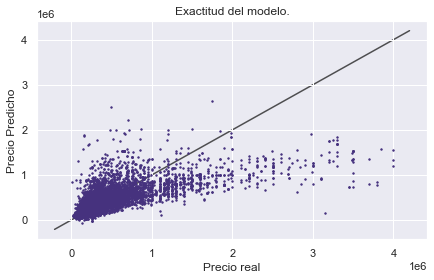

In [76]:
compa_y(y_test,y_test_pred)

Una vez establecido nuestro modelo benchmark procedemos a realizar otros modelos de regresión más profundos, inicialmente con hiperparametrós cualquiera:

<h1>Regresor KNN</h1>

Definimos y entrenamos nuestro modelo de regresión de vecinos cercanos para un numero de vecinos de 15: 

In [77]:
knn_regressor = KNeighborsRegressor(n_neighbors=15)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

Realizamos la predicción en el conjunto de entrenamiento y prueba:

In [78]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+--------+--------+
| MÉTRICA | TRAIN  |  TEST  |
+---------+--------+--------+
|   MAE   | 63638  | 68265  |
|   RMSE  | 151504 | 166152 |
|    R2   | 0.741  | 0.698  |
|   R2_A  | 0.741  | 0.698  |
+---------+--------+--------+


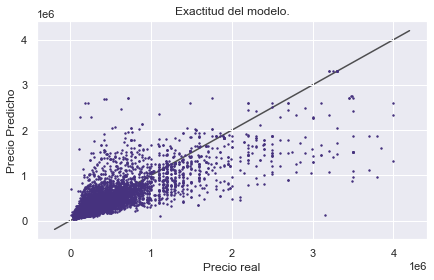

In [79]:
compa_y(y_test,y_test_pred)

<h1>Arbol de regresión

Ahora nuestro siguiente modelo de regresión sera un arbor de decisiones el cual probaremos con una profundidad de 15, el cual definimos y entrenamos a continuación:

In [80]:
tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

Realizando la predicción de ambos conjuntos:

In [81]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+-------+--------+
| MÉTRICA | TRAIN |  TEST  |
+---------+-------+--------+
|   MAE   | 36750 | 56196  |
|   RMSE  | 76582 | 149649 |
|    R2   | 0.934 | 0.755  |
|   R2_A  | 0.934 | 0.755  |
+---------+-------+--------+


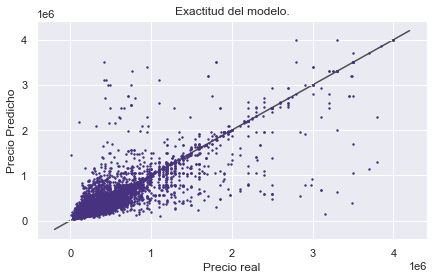

In [82]:
compa_y(y_test,y_test_pred)

<h1>Optimización de modelos

Una vez diseñados los modelos con unos hiperparámetros arbitrarios, procedemos ahora a escogerlos de una manera óptima para mejorar nuestros modelos es decir obtener mejores resultados para nuestras métricas de evaluación, para esto definiremos la función **optimos** que nos ayudara a encontrar el valor mínimo de MAE y RMSE y máximo de R-Cuadrado dentro de un rango de hiperparámetros dado por nosotros:

In [94]:
def optimos(tipo_r,valores):
    rango=valores
    MAE_train = []
    MAE_test = []
    RMSE_train = []
    RMSE_test = []
    r2_train=[]
    r2_test=[]
    
    for k in rango:
        if tipo_r=='knn':
            knn_regressor = KNeighborsRegressor(n_neighbors = k)
            knn_regressor.fit(X_train, y_train)

            y_train_pred = knn_regressor.predict(X_train)
            y_test_pred = knn_regressor.predict(X_test)
        
        if tipo_r=='tree':
            tree_regressor = DecisionTreeRegressor(max_depth=k, random_state=42)
            tree_regressor.fit(X_train, y_train)

            y_train_pred = tree_regressor.predict(X_train)
            y_test_pred = tree_regressor.predict(X_test)

        MAE_train_k = metrics.mean_absolute_error(y_train,y_train_pred)
        MAE_test_k  = metrics.mean_absolute_error(y_test,y_test_pred)
        MAE_train.append(MAE_train_k)
        MAE_test.append(MAE_test_k)
        min_MAE=np.amin(MAE_test)
        min_MAE_i=MAE_test.index(min_MAE)+valores[0]

        RMSE_train_k = np.sqrt(mean_squared_error(y_train,y_train_pred))
        RMSE_test_k  = np.sqrt(mean_squared_error(y_test,y_test_pred))
        RMSE_train.append(RMSE_train_k)
        RMSE_test.append(RMSE_test_k)
        min_RMSE=np.amin(RMSE_test)
        min_RMSE_i=RMSE_test.index(min_RMSE)+valores[0]

        r2_train_k = metrics.r2_score(y_train, y_train_pred)
        r2_test_k = metrics.r2_score(y_test, y_test_pred)
        r2_train.append(r2_train_k)
        r2_test.append(r2_test_k)
        max_r2=np.amax(r2_test)
        max_r2_i=r2_test.index(max_r2)+valores[0]


    fig = plt.figure(1,figsize=(15,4))
    ax1 = fig.add_subplot(131)
    ax1.plot(rango,MAE_train,'o-',label="train",color=sns.color_palette("viridis")[0])
    ax1.plot(rango,MAE_test,'o-',label="test",color=sns.color_palette("viridis")[3])
    ax1.scatter(min_MAE_i,min_MAE,s=100,marker='D',color=sns.color_palette("viridis")[5])
    ax1.set_title('Metrica MAE')
    if tipo_r=='knn': 
        ax1.set_xlabel('# de vecinos')
    if tipo_r=='tree': 
        ax1.set_xlabel('Profundidad')
    ax1.set_ylabel('MAE')
    ax1.set_xticks(rango)
    ax1.legend()

    ax2 = fig.add_subplot(132)
    ax2.plot(rango,RMSE_train,'o-',label="train",color=sns.color_palette("viridis")[0])
    ax2.plot(rango,RMSE_test,'o-',label="test",color=sns.color_palette("viridis")[3])
    ax2.scatter(min_RMSE_i,min_RMSE,s=100,marker='D',color=sns.color_palette("viridis")[5])
    ax2.set_title('Metrica RSME')
    if tipo_r=='knn': 
        ax2.set_xlabel('# de vecinos')
    if tipo_r=='tree': 
        ax2.set_xlabel('Profundidad')
    ax2.set_ylabel('RMSE')
    ax2.set_xticks(rango)
    ax2.legend()

    ax3 = fig.add_subplot(133)
    ax3.plot(rango,r2_train,'o-',label="train",color=sns.color_palette("viridis")[0])
    ax3.plot(rango,r2_test,'o-',label="test",color=sns.color_palette("viridis")[3])
    ax3.scatter(max_r2_i,max_r2,s=100,marker='D',color=sns.color_palette("viridis")[5])
    ax3.set_title('Metrica R-Cuadrado')
    if tipo_r=='knn': 
        ax3.set_xlabel('# de vecinos')
    if tipo_r=='tree': 
        ax3.set_xlabel('Profundidad')
    ax3.set_ylabel('R-Cuadrado')
    ax3.set_xticks(rango)
    ax3.legend()
    fig.subplots_adjust(wspace=0.3)

    plt.show()

<h2>Regresor KNN</h2>

Empezamos nuevamento con nuestro modelo KNN, para el cual optimizaremos el hiperparametro de vecinos cercanos:

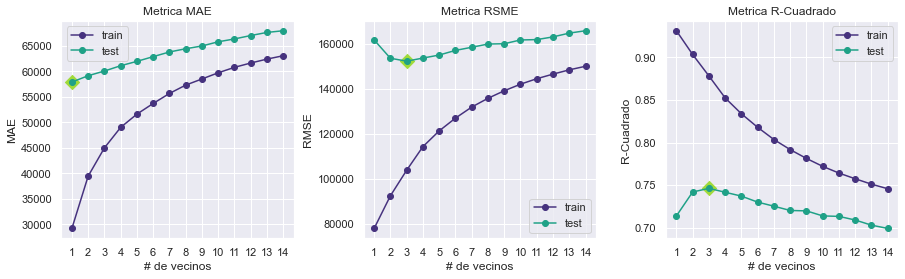

In [96]:
valores=range(1,15)
optimos('knn',valores)

Con lo anterior podemos llegar a la conclusión que el hiperparámetro más óptimo para nuestro modelo de vecinos cercanos corresponde a 3 vecinos en donde maximizaremos la métrica **R-Cuadrado** y minimizaremos la métrica **RMSE**

<h2>Arbol de decisiones</h2>

Continuamos con nuestro modelo de regresión de arbol de decisiones, para el cual optimizaremos el hiperparametro de profundidad:

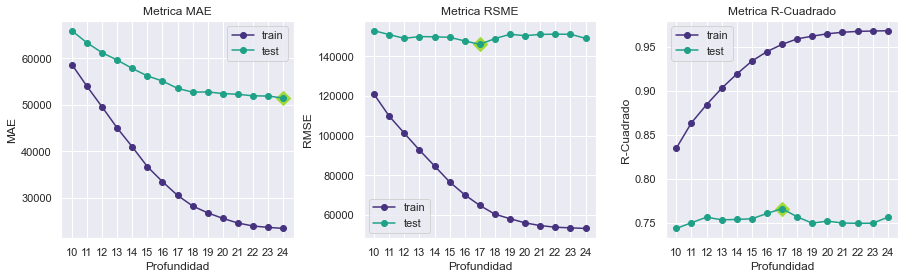

In [95]:
valores=range(10,25)
optimos('tree',valores)

Con lo anterior podemos llegar a la conclusión que el hiperparámetro óptimo para nuestro modelo de árbol de decisiones corresponde a una profundidad de 17 en donde maximizaremos la métrica **R-Cuadrado** y minimizaremos la métrica **RMSE**.

<h1>Modelos con hiperparametros optimizados

Una vez encontrados los hiperparametros que optimizan nuestros dos modelos procedemos a definirlos y entrenarlos con estos:

<h2>Regresor KNN (3 Vecinos)</h2>

Definimos y entrenamos a partir de 3 vecinos:

In [97]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Realizamos la predicción:

In [98]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+--------+--------+
| MÉTRICA | TRAIN  |  TEST  |
+---------+--------+--------+
|   MAE   | 44980  | 60028  |
|   RMSE  | 103804 | 152318 |
|    R2   | 0.878  | 0.746  |
|   R2_A  | 0.878  | 0.746  |
+---------+--------+--------+


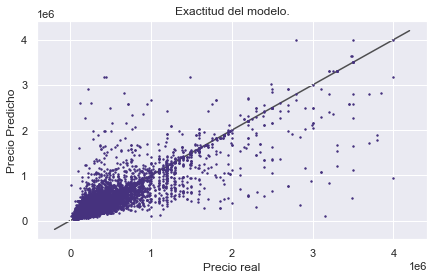

In [99]:
compa_y(y_test,y_test_pred)

<h1>Arbol de regresión (Profundidad 17)

Definimos y entrenamos a partir de un arbol de profundidad 17:

In [100]:
tree_regressor = DecisionTreeRegressor(max_depth=17, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=42)

Realizamos la predicción:

In [101]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+-------+--------+
| MÉTRICA | TRAIN |  TEST  |
+---------+-------+--------+
|   MAE   | 30589 | 53525  |
|   RMSE  | 64721 | 146093 |
|    R2   | 0.953 | 0.766  |
|   R2_A  | 0.953 | 0.766  |
+---------+-------+--------+


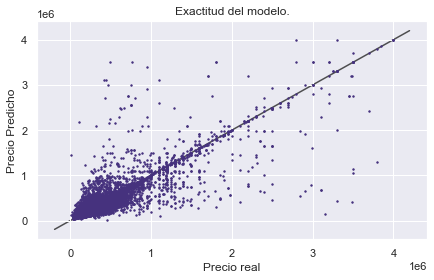

In [102]:
compa_y(y_test,y_test_pred)

<h1>Elección del modelo

Basándonos en las optimizaciones de nuestros modelos se llega a la conclusión que el mejor modelo para trabajar es el del árbol de decisiones con profundidad de 17, pues en este modelo tenemos las métricas de evaluación R-Cuadrado mayor y MAE-RMSE menores que el modelo óptimo de regresión de vecinos cercanos y que nuestro modelo benchmark.

<h1>Sección adicional

En este sentido los modelos podrían se mejores utilizando información que se tiene disponible pero no se usa, como el tipo de inmueble, pues se podría crear un modelo que dependiendo de tipo de inmueble realice una regresión óptima para ese tipo de inmueble, adicional de que el filtrado del dataset pudo ser más riguroso para todas las variables como se realizó en el segundo punto de este trabajo, razón por la cual trabajaremos con ese dataset de aquí en adelante.

Para poder utilizar la variable property_type debemos realizar la conversión de variable categórica a una variable numérica:

In [137]:
data_n.property_type.value_counts()

Departamento    65528
PH               8278
Casa             2015
Name: property_type, dtype: int64

In [138]:
cleanup_type = {"property_type":{"Departamento": 1, "PH": 2,'Casa':3}}

In [139]:
data_n = data_n.replace(cleanup_type)
data_n.property_type.value_counts()

1    65528
2     8278
3     2015
Name: property_type, dtype: int64

Ahora en nuestro dataset los departamentos corresponden a 1, PH a 2 y las casas a 3.

Filtramos los valores nulos de nuestro dataset:

In [140]:
data_n = data_n.dropna().copy()

Seleccionamos nuestras variables predictorias **(X)** junto con la variable de interes a predecir **(y)** la cual sera el precio de la propiedad:

In [141]:
X = data_n[['rooms','bedrooms','bathrooms','surface_total','surface_covered','property_type']]
y = data_n['price']

Ahora realizamos el Train/Split de los datos para una proporcion de los datos de prueba del 30%:

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Como el modelo que mejores resultados nos dio anteriormente fue el arbol de regresión, en esta ocasión seguiremos trabajando con el, entonces hallamos el hiperparametro optimo para este nuevo modelo:

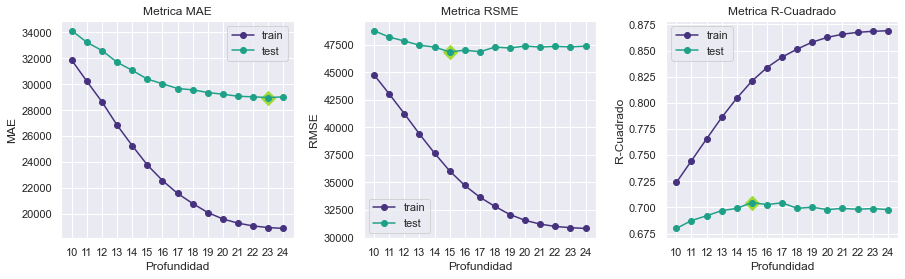

In [143]:
valores=range(10,25)
optimos('tree',valores)

En este caso nos dio una profundidad de 15, con la cual definiremos y entrenaremos nuestro modelo:

In [144]:
tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+-------+-------+
| MÉTRICA | TRAIN |  TEST |
+---------+-------+-------+
|   MAE   | 23769 | 30399 |
|   RMSE  | 36048 | 46838 |
|    R2   | 0.821 | 0.705 |
|   R2_A  | 0.821 | 0.705 |
+---------+-------+-------+


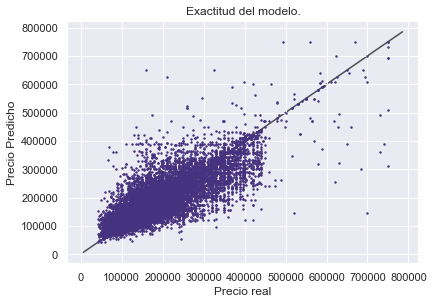

In [145]:
compa_y(y_test,y_test_pred)

Vemos que con la inclusión del tipo de inmueble nuestras métricas de error MAE y RMSE disminuyeron 43.2% y 67.93% respectivamente, pero no todo mejoro, vemos como la métrica de R-Cuadrado disminuyo en un 7.96%, sin embargo, la disminución que se obtuvo de las dos primeras métricas hace que la disminución en R-Cuadrado sea una situación que vale la pena asumir en el modelo.

Ahora bien, observando la distribución de los puntos en la gráfica de los precios predichos contra los precios reales, es más uniforme respecto a la diagonal.

Otra acción que podemos llevar a cabo es no tomar todas las variables para X del dataset por que como observamos gracias al análisis de correlación de la segunda parte, la variable **rooms** está estrechamente correlacionada con la variable **bedrooms** y poco correlacionada con la variable **price**, de esta manera escogemos la que más se relacione con la variable **price**:

In [146]:
X = data_n[['rooms','bathrooms','surface_total','surface_covered','property_type']]
y = data_n['price']

Ahora realizamos el Train/Split de los datos para una proporcion de los datos de prueba del 30%:

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

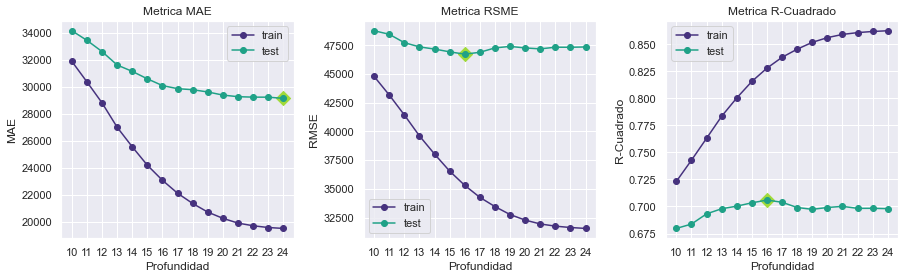

In [148]:
valores=range(10,25)
optimos('tree',valores)

In [149]:
tree_regressor = DecisionTreeRegressor(max_depth=16, random_state=42)
tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

De esta manera una vez realizadas las predicciones hallamos las metricas de evaluación definidas y comparamos graficamente los valores predichos contra los reales:

+---------+-------+-------+
| MÉTRICA | TRAIN |  TEST |
+---------+-------+-------+
|   MAE   | 23077 | 30106 |
|   RMSE  | 35304 | 46733 |
|    R2   | 0.828 | 0.706 |
|   R2_A  | 0.828 | 0.706 |
+---------+-------+-------+


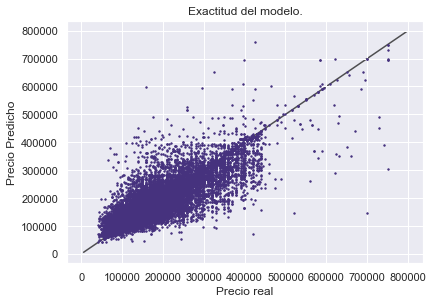

In [150]:
compa_y(y_test,y_test_pred)

Dejando de lado la variable **bedrooms** de nuestra X, logramos disminuir las metricas **MAE** y **RMSE** a la vez que mantuvimos y aumentamos la metrica **R-Cuadrado** en un porcentaje pequeño, sin embargo, logramos un mejor modelo teniendo una variable menos en el entrenamiento, lo cual es significativo.

<h1>MODELO SELECCIONADO

Para la predicción del precio de la propiedad obtuvimos el mejor resultado realizando un modelo de regresión de árbol de decisiones con profundidad 16, a partir del dataset filtrado por Boxplots de cada variable para cada tipo de propiedad, empleando como variables predictoras:

* Cuartos.
* Baños.
* Superficie total.
* Superficie Cubierta.
* Tipo de propiedad. 

